# Predicting Player Engagement: Using KNN Regression to Identify High-Activity Gamers

Authors: Hunter, Sophia, Jiho, and Freya

## Introduction

<span style="color:pink;">Delete the pink when submitting!!!
Title
Introduction:
provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
clearly state the question you tried to answer with your project
identify and fully describe the dataset that was used to answer the question
</span>

#### Background Information

Understanding player engagement in online gaming is crucial for improving user experience and optimizing recruitment strategies. Online games generate vast amounts of data, but identifying which players are most likely to contribute substantial gameplay data can help developers and researchers make informed decisions. Our project explores the factors influencing player engagement by analyzing a *PLAICraft* study dataset.

#### The Question

The primary research question we aim to answer is: **Which kinds of players are most likely to contribute a large amount of data so that those players can be targeted in recruiting efforts?** More specifically, we investigate whether **age, experience, and subscription status** can predict the total hours a player spends in the game. To achieve this, we apply **K-Nearest Neighbors (KNN) Regression**, focusing on the predictors "subscribe", "age" and "experience," as these variables showed strong correlations with gameplay hours and contained the most usable data.

#### The Data

The dataset used for this analysis, **players.csv**, consists of **196 observations** and **7 variables**, capturing demographic and gameplay information from participants in the PLAICraft study. The variables include:

| Variables | Description | Datatype |
|----------|----------|----------|
| experience | The level of experience of the player (beginner, amateur, regular, veteran, pro) | character   |
| subscribe  | Whether the player subscribed to PLAICraft email updates  | logical  |
| hashedEmail  | An anonymous email assigned to each player |character   |
| played_hours | The total number of hours the player has spent in-game   | double  |
| name  | An anonymous name the player has chosen for their in-game character   | character   |
| gender  | The gender of the player   | character   |
| age  | The age of the player   | integer   |

## Methods & Results

<span style="color:pink;">Delete the pink when submitting!!!
Methods & Results:
describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
loads data 
wrangles and cleans the data to the format necessary for the planned analysis
performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
performs the data analysis
creates a visualization of the analysis 
note: all figures should have a figure number and a legend
</span>

#### Why KNN Regression?

KNN Regression is well-suited for this dataset because it effectively captures **non-linear relationships** between predictor and response variables. Unlike linear regression, KNN does not assume a specific functional form, making it more flexible for complex patterns in gameplay behavior. Since KNN relies on distance-based comparisons, **feature scaling** is necessary to ensure accurate predictions.

#### Assumptions and Limitations

Applying KNN regression requires certain assumptions:
- **Feature Scaling:** Normalization or standardization is essential for fair distance-based comparisons.
- **Sufficient Data Density:** Adequate representation of all player types ensures reliable nearest-neighbor predictions.
- **Choice of k:** The k-value must balance bias and variance to prevent overfitting or excessive smoothing.

Potential limitations of KNN include:
- **Computational inefficiency:** KNN can be slow for large datasets due to repeated distance calculations.
- **High-dimensionality issues:** The method struggles with performance as the number of predictor variables increases.
- **Sensitivity to outliers:** Noisy or extreme values can significantly impact predictions.

#### Data Challenges

Several issues were identified in the dataset:
- **Incorrect Data Types:** "Experience" and "Gender" were read as character variables but should be factors.
- **Missing Data:** Two missing values were found in the "Age" variable, requiring appropriate handling before analysis.

By addressing these challenges and leveraging KNN regression, we aim to gain insights into the characteristics of highly engaged players, helping game developers and researchers improve player retention and targeted recruitment efforts.

#### Loading the Data

First, we load the necessary libraries to manage data frames, adjust graph sizes, and build predictive models effectively.

In [10]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Then, we download the player data and read it into R.

In [11]:
players_url <- "https://drive.google.com/uc?export=download&id=18CyKdv1ppgp7RraugrDq66w_T-6dkrdG"
download.file(players_url, "players.csv")
players <- read_csv("players.csv")
glimpse(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


#### Wrangling the Data

We need to convert columns to their proper types—experience and gender as factors and Age as an integer. Additionally, we will remove rows with missing values, which only occur in the Age column.

In [15]:
# ok so here I was just looking at the written code in the group project versus my own, and we both did extra stuff
# that the other person didn't do, so I combined the codes
# we can delete the players1 and players2 when necessary

# players1 <- mutate(players,
#     experience = as_factor(experience),
#     gender = as_factor(gender),
#     Age = as.integer(Age)) |>
#     filter(!is.na(Age))
# glimpse(players1)

# players2 <- players |>
#     mutate(individualId = seq(1, 196)) |>
#     mutate(experience = as_factor(experience),
#           gender = as_factor(gender)) |>
#     filter(!is.na(Age))
# players2

players <- players |>
    mutate(individualId = seq(1, 196),
        experience = as_factor(experience),
        gender = as_factor(gender),
        Age = as.integer(Age)) |>
    filter(!is.na(Age))
head(players, 5)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,individualId
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,1
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,2
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,3
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,4
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,5


#### Summary of Dataset

Since we are concerned with experience, gender, subscribe, age, and played_hours for our model, let's make some tables of summary statistics for the counts/measures of center of those variables.

In [33]:
summarize(players, 
    average_played_hours = mean(played_hours),
    median_played_hours = median(played_hours),
    average_age = mean(Age),
    median_age = median(Age))
summarize(group_by(players, experience), count = n())
summarize(group_by(players, subscribe), count = n())
summarize(group_by(players, gender), count = n())

average_played_hours,median_played_hours,average_age,median_age
<dbl>,<dbl>,<dbl>,<dbl>
5.904639,0.1,20.52062,19


experience,count
<fct>,<int>
Pro,13
Veteran,48
Amateur,63
Regular,35
Beginner,35


subscribe,count
<lgl>,<int>
FALSE,52
TRUE,142


gender,count
<fct>,<int>
Male,124
Female,37
Non-binary,15
Prefer not to say,11
Agender,2
Two-Spirited,5


[additional summary]

#### Visualizations

[description of methods]

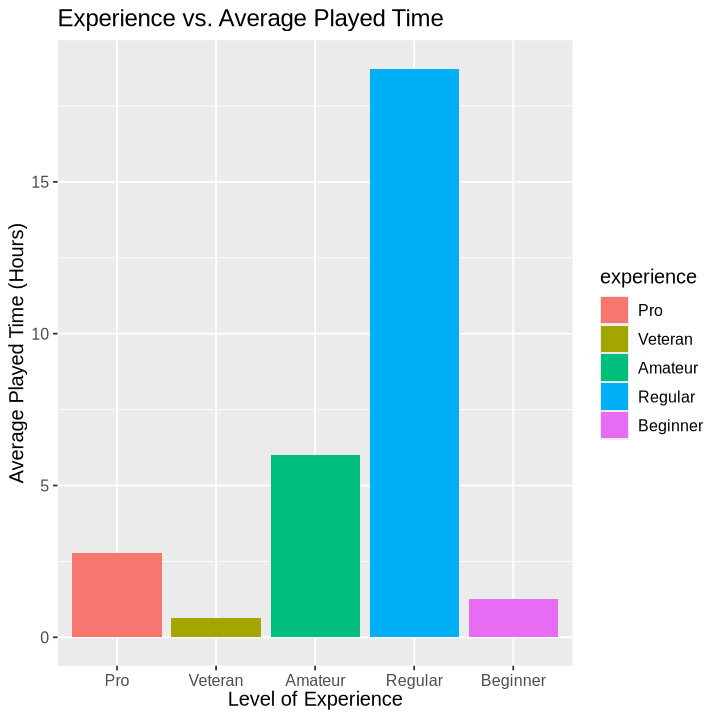

In [35]:
# these visualizations are relevant for exploratory data analysis and related to the planned analysis

# note: all figures should have a figure number and a legend
experience_mean <- players |>
    group_by(experience) |>
    summarize(mean_played_hours = mean(played_hours))
options(repr.plot.width = 6, repr.plot.height = 6)
experience_hours <- ggplot(experience_mean, aes(x = experience, y = mean_played_hours, fill = experience)) +
                    geom_bar(stat = "identity") +
                    labs(x = "Level of Experience", y = "Average Played Time (Hours)", title = "Experience vs. Average Played Time") +
                    theme(text = element_text(size = 12))

experience_hours

#### Modeling and Analysis

[description of methods]

In [ ]:
# should include visualizations of model

## Discussion (write in Discussion.md first)

#### Summary

...

#### Is this what you expected?

...

#### What is the impact of the findings?

...

#### Future Questions

...